In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# create processed.statlog.data file which is csv file of raw data
df = pd.read_csv('statlog-heart.dat', delimiter = ' ')
df.to_csv('processed.statlog.data', index=None)

# create processed.hungarian.data file which is csv file of raw data
df = pd.read_csv('processed.hungarian.data.original', delimiter = ' ')
df.to_csv('processed.hungarian.data', index=None)


In [2]:
def data_cleaning(filename):
    df = pd.read_csv(filename, na_values=["?", "-9.0", "-9"])
    
    # remove duplicates if any
    df = df.drop_duplicates()
    
    # remove columns 12 and 13 since all raw data files don't have these columns
    df = df.drop(df.columns[[11, 12]], axis=1)

    # add header
    dataFile = pd.DataFrame(df.values, columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'OldPeak', 'ST_Slope', 'HeartDisease'])
    
    # update heartDisease column to be 0 or 1
    if "statlog" in filename:
        for i in dataFile.index:
            if dataFile.at[i, 'HeartDisease'] == 1.0:
                dataFile.at[i, 'HeartDisease'] = 0
            else:
                dataFile.at[i, 'HeartDisease'] = 1
    else:
        for i in dataFile.index:
            if dataFile.at[i, 'HeartDisease'] > 0.0:
                dataFile.at[i, 'HeartDisease'] = 1
            else:
                dataFile.at[i, 'HeartDisease'] = 0
    
    dataFile = dataFile.fillna(method='pad')
    dataFile = dataFile.dropna(axis = 0, how ='any')
    
    dataFile = dataFile.astype({"HeartDisease": 'int'}) #({"Age": 'int', "Sex": 'int', "ChestPainType": 'int'})
    
    #display(dataFile.dtypes)
    
    # write results to file
    dataFile.to_csv(filename + '.11', index=None)


In [3]:
# clean all the raw data files
data_cleaning("processed.statlog.data")
data_cleaning("processed.cleveland.data")
data_cleaning("processed.hungarian.data")
data_cleaning("processed.switzerland.data")
data_cleaning("processed.va.data")

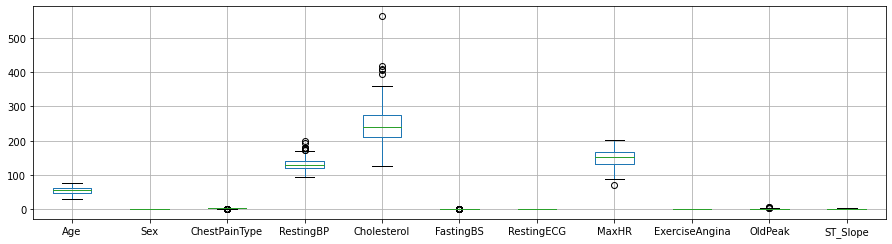

In [4]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data = pd.read_csv("processed.cleveland.data.11")
boxplot = data.boxplot(column=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'OldPeak', 'ST_Slope'])
plt.show()

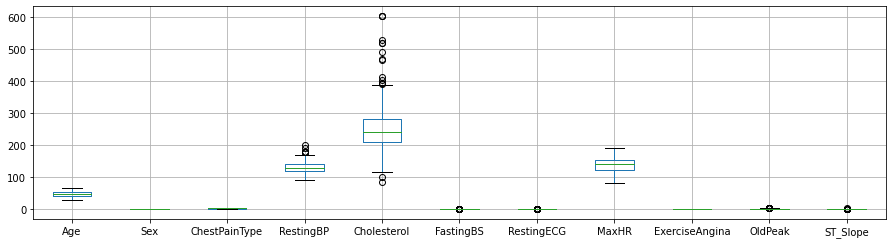

In [5]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data = pd.read_csv("processed.hungarian.data.11") 
boxplot = data.boxplot(column=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'OldPeak', 'ST_Slope'])
plt.show()

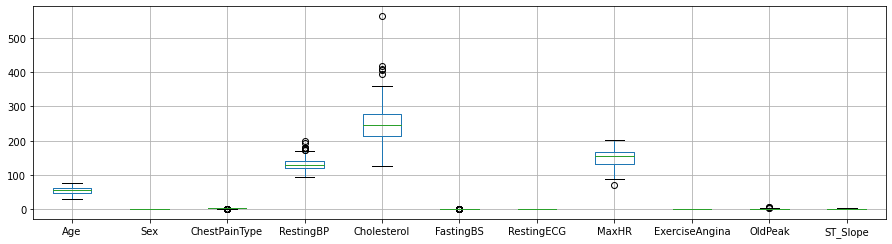

In [6]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data = pd.read_csv("processed.statlog.data.11") 
boxplot = data.boxplot(column=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'OldPeak', 'ST_Slope'])
plt.show()

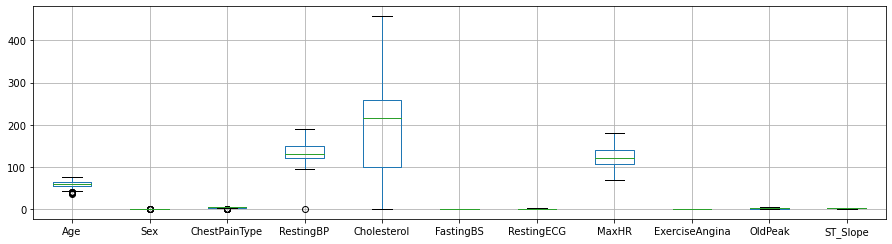

In [7]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data = pd.read_csv("processed.va.data.11") 
boxplot = data.boxplot(column=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'OldPeak', 'ST_Slope'])
plt.show()

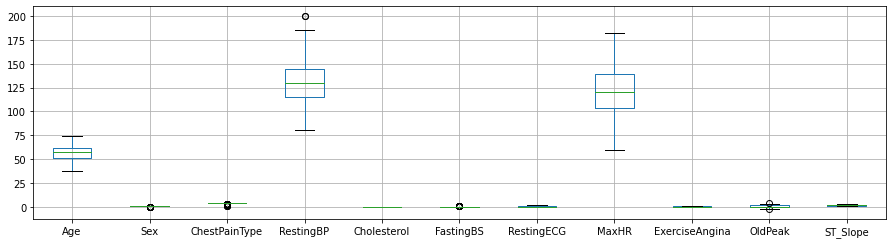

In [8]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data = pd.read_csv("processed.switzerland.data.11") 
boxplot = data.boxplot(column=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'OldPeak', 'ST_Slope'])
plt.show()

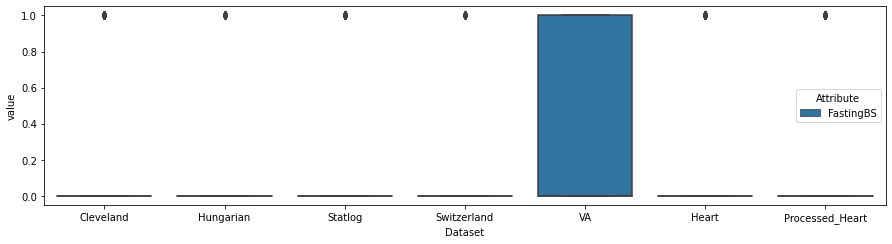

In [9]:
# Plotting a combined boxplot for attribute comparison for fasting BS. 
# Issue 1: VA and Fasting BS
cleveland_data = pd.read_csv("processed.cleveland.data.11")
hungarian_data = pd.read_csv("processed.hungarian.data.11")
statlog_data = pd.read_csv("processed.statlog.data.11")
switzerland_data = pd.read_csv("processed.switzerland.data.11") 
va_data = pd.read_csv("processed.va.data.11")
heart_data = pd.read_csv("heart.csv")
pheart_data = pd.read_csv("processed.heart.csv")

data1 = pd.DataFrame(cleveland_data, columns=['FastingBS']).assign(Dataset='Cleveland')
data2 = pd.DataFrame(hungarian_data, columns=['FastingBS']).assign(Dataset='Hungarian')
data3 = pd.DataFrame(statlog_data, columns=['FastingBS']).assign(Dataset='Statlog')
data4 = pd.DataFrame(switzerland_data, columns=['FastingBS']).assign(Dataset='Switzerland')
data5 = pd.DataFrame(va_data, columns=['FastingBS']).assign(Dataset='VA')
data6 = pd.DataFrame(heart_data, columns=['FastingBS']).assign(Dataset='Heart')
data7 = pd.DataFrame(pheart_data, columns=['FastingBS']).assign(Dataset='Processed_Heart')

cdf = pd.concat([data1, data2, data3, data4, data5, data6, data7])    
mdf = pd.melt(cdf, id_vars=['Dataset'], var_name=['Attribute'])

ax = sns.boxplot(x="Dataset", y="value", hue="Attribute", data=mdf)
plt.show()

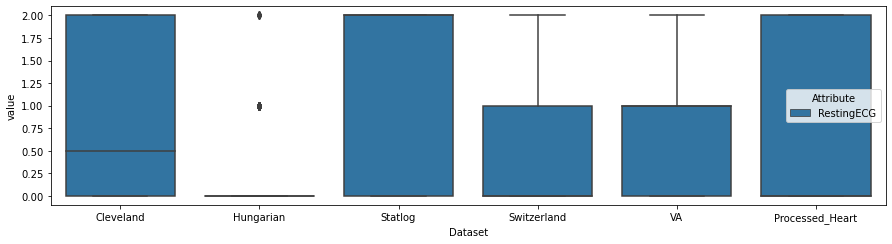

In [10]:
# Plotting a combined boxplot for attribute comparison for Resting ECG
# Issue: 1. Hungarian ECG 
cleveland_data = pd.read_csv("processed.cleveland.data.11")
hungarian_data = pd.read_csv("processed.hungarian.data.11")
statlog_data = pd.read_csv("processed.statlog.data.11")
switzerland_data = pd.read_csv("processed.switzerland.data.11") 
va_data = pd.read_csv("processed.va.data.11")
pheart_data = pd.read_csv("processed.heart.csv")

data1 = pd.DataFrame(cleveland_data, columns=['RestingECG']).assign(Dataset='Cleveland')
data2 = pd.DataFrame(hungarian_data, columns=['RestingECG']).assign(Dataset='Hungarian')
data3 = pd.DataFrame(statlog_data, columns=['RestingECG']).assign(Dataset='Statlog')
data4 = pd.DataFrame(switzerland_data, columns=['RestingECG']).assign(Dataset='Switzerland')
data5 = pd.DataFrame(va_data, columns=['RestingECG']).assign(Dataset='VA')
data6 = pd.DataFrame(pheart_data, columns=['RestingECG']).assign(Dataset='Processed_Heart')

cdf = pd.concat([data1, data2, data3, data4, data5, data6])    
mdf = pd.melt(cdf, id_vars=['Dataset'], var_name=['Attribute'])

ax = sns.boxplot(x="Dataset", y="value", hue="Attribute", data=mdf)
plt.show()

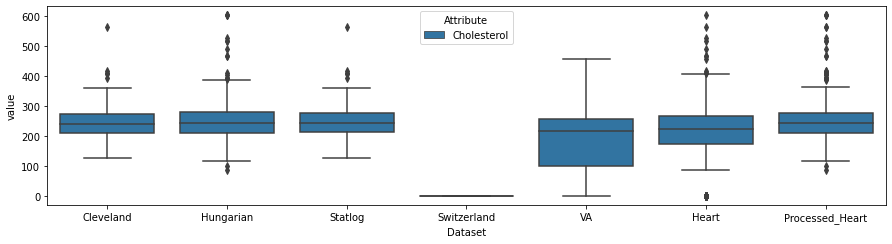

In [11]:
# Plotting a combined boxplot for attribute comparison for Cholesterol
# Issues: 1. Switzerland is missing Cholesterol 2. VA has 0 values for cholesterol
cleveland_data = pd.read_csv("processed.cleveland.data.11")
hungarian_data = pd.read_csv("processed.hungarian.data.11")
statlog_data = pd.read_csv("processed.statlog.data.11")
switzerland_data = pd.read_csv("processed.switzerland.data.11") 
va_data = pd.read_csv("processed.va.data.11")
heart_data = pd.read_csv("heart.csv")
pheart_data = pd.read_csv("processed.heart.csv")

data1 = pd.DataFrame(cleveland_data, columns=['Cholesterol']).assign(Dataset='Cleveland')
data2 = pd.DataFrame(hungarian_data, columns=['Cholesterol']).assign(Dataset='Hungarian')
data3 = pd.DataFrame(statlog_data, columns=['Cholesterol']).assign(Dataset='Statlog')
data4 = pd.DataFrame(switzerland_data, columns=['Cholesterol']).assign(Dataset='Switzerland')
data5 = pd.DataFrame(va_data, columns=['Cholesterol']).assign(Dataset='VA')
data6 = pd.DataFrame(heart_data, columns=['Cholesterol']).assign(Dataset='Heart')
data7 = pd.DataFrame(pheart_data, columns=['Cholesterol']).assign(Dataset='Processed_Heart')

cdf = pd.concat([data1, data2, data3, data4, data5, data6, data7])    
mdf = pd.melt(cdf, id_vars=['Dataset'], var_name=['Attribute'])

ax = sns.boxplot(x="Dataset", y="value", hue="Attribute", data=mdf)
plt.show()

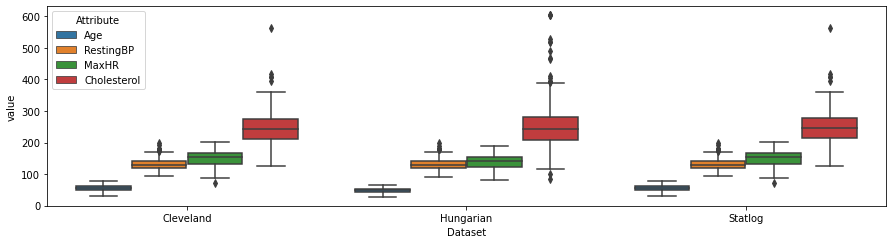

In [12]:
# Based on the box plots above, we conclude that the switzerland and va datasets are not optimal for this study since they
# have missing or incorrect values for cholesterol. Hence we will only consider the other 3 datasets.
# Plotting a combined boxplot for attribute comparison for age, resting BP, thalach and cholesterol
cleveland_data = pd.read_csv("processed.cleveland.data.11")
hungarian_data = pd.read_csv("processed.hungarian.data.11")
statlog_data = pd.read_csv("processed.statlog.data.11")

data1 = pd.DataFrame(cleveland_data, columns=['Age','RestingBP','MaxHR', 'Cholesterol']).assign(Dataset='Cleveland')
data2 = pd.DataFrame(hungarian_data, columns=['Age','RestingBP','MaxHR', 'Cholesterol']).assign(Dataset='Hungarian')
data3 = pd.DataFrame(statlog_data, columns=['Age','RestingBP','MaxHR', 'Cholesterol']).assign(Dataset='Statlog')

cdf = pd.concat([data1, data2, data3])    
mdf = pd.melt(cdf, id_vars=['Dataset'], var_name=['Attribute'])

ax = sns.boxplot(x="Dataset", y="value", hue="Attribute", data=mdf)    
plt.show()

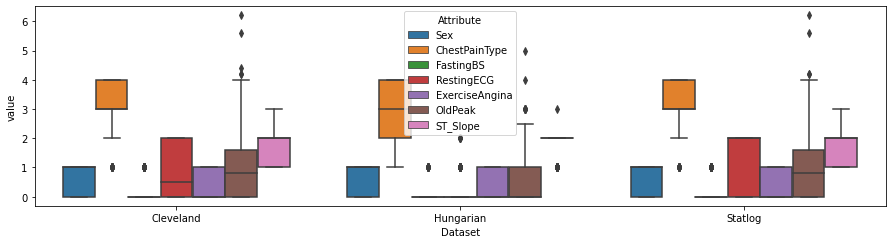

In [13]:
# Plotting a combined boxplot for attribute comparison for sex, chest pain type, fasting BS, resting ECG, execise angina, oldpeak and st_slope
cleveland_data = pd.read_csv("processed.cleveland.data.11")
hungarian_data = pd.read_csv("processed.hungarian.data.11")
statlog_data = pd.read_csv("processed.statlog.data.11")

data1 = pd.DataFrame(cleveland_data, columns=['Sex', 'ChestPainType','FastingBS', 'RestingECG', 'ExerciseAngina', 'OldPeak', 'ST_Slope']).assign(Dataset='Cleveland')
data2 = pd.DataFrame(hungarian_data, columns=['Sex', 'ChestPainType','FastingBS', 'RestingECG', 'ExerciseAngina', 'OldPeak', 'ST_Slope']).assign(Dataset='Hungarian')
data3 = pd.DataFrame(statlog_data, columns=['Sex', 'ChestPainType','FastingBS', 'RestingECG', 'ExerciseAngina', 'OldPeak', 'ST_Slope']).assign(Dataset='Statlog')

cdf = pd.concat([data1, data2, data3])    
mdf = pd.melt(cdf, id_vars=['Dataset'], var_name=['Attribute'])

ax = sns.boxplot(x="Dataset", y="value", hue="Attribute", data=mdf)
plt.show()

In [14]:
# now lets combine the 3 dataset files into 1
cleveland_data = pd.read_csv("processed.cleveland.data.11")
hungarian_data = pd.read_csv("processed.hungarian.data.11")
statlog_data = pd.read_csv("processed.statlog.data.11")
combined_csv = pd.concat([cleveland_data, hungarian_data, statlog_data])

combined_csv.to_csv("processed.heart.csv", index=None)

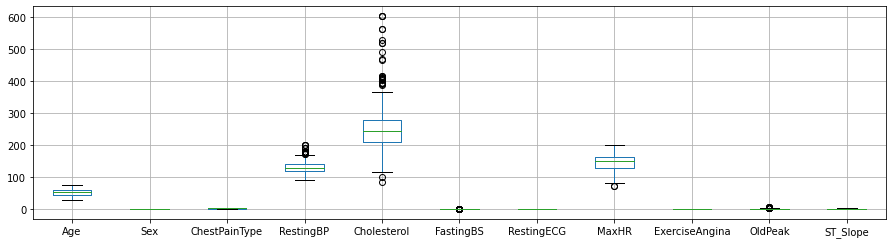

In [15]:
# box plots of final merged dataset 
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data = pd.read_csv("processed.heart.csv") 
boxplot = data.boxplot(column=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'OldPeak', 'ST_Slope'])
plt.show()

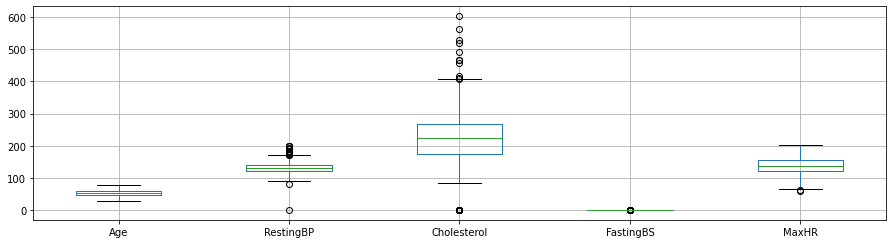

In [16]:
# box plots for original heart.csv from Kaggle, https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data = pd.read_csv("heart.csv") 
boxplot = data.boxplot(column=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR'])
plt.show()

In [17]:
# now lets combine the 2 dataset files into 1 
cleveland_data = pd.read_csv("processed.cleveland.data.11")
statlog_data = pd.read_csv("processed.statlog.data.11")
combined_csv = pd.concat([cleveland_data, statlog_data])

combined_csv.to_csv("processed.heart.csv.2", index=None)